In [1]:
import RPi.GPIO
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
import os

pid = os.getpid()
os.system(f"sudo renice -n -19 -p {pid}")

15281 (process ID) old priority 0, new priority -19


0

In [3]:
RPi.GPIO.setmode(RPi.GPIO.BOARD)

In [4]:
RPi.GPIO.getmode()

10

In [5]:
PIN = 11

In [6]:
RPi.GPIO.setup(PIN, RPi.GPIO.IN, pull_up_down=RPi.GPIO.PUD_OFF)

In [7]:
RPi.GPIO.add_event_detect(PIN, RPi.GPIO.RISING)

In [9]:
RPi.GPIO.event_detected(PIN)

True

In [10]:
RPi.GPIO.input(PIN)

1

In [12]:
class Callback:
    def __init__(self, channel):
        self.channel = channel
        self.times = []

    def __call__(self, channel):
        self.times.append(time.time_ns())

In [13]:
callback = Callback(PIN)
RPi.GPIO.add_event_callback(PIN, callback)

In [24]:
diff = np.diff(callback.times) / 1e9
np.min(diff), np.max(diff), len(diff)

(np.float64(0.037842629), np.float64(0.045720473), 2594)

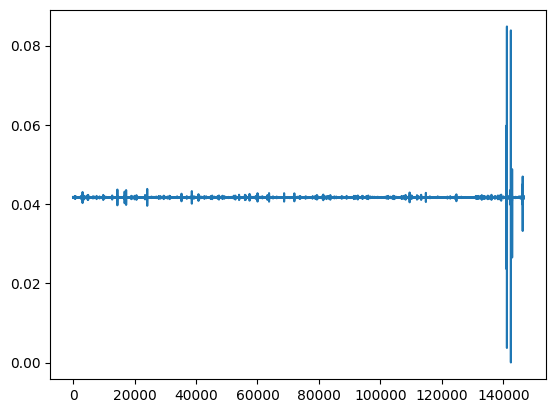

In [36]:
plt.plot(diff)
# plt.xlim(5700, 5800)